# Task 7: Support Vector Machine

#### 1.Loading dataset and preprocessing

In [56]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt

In [57]:
data=pd.read_csv('breast-cancer.csv')

In [58]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [59]:
data.isnull().sum()


id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [60]:
#encoding categorical variables
cat_cols=data.select_dtypes(include=['object']).columns
cat_cols

Index(['diagnosis'], dtype='object')

In [61]:
from sklearn.preprocessing import LabelEncoder

In [62]:
le=LabelEncoder()
data[cat_cols] = data[cat_cols].apply(le.fit_transform)

In [63]:
#Splitting and standardizing
X = data.drop(columns=['id', 'diagnosis'], axis=1)
y=data['diagnosis']


In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [65]:
#Standardizing the features
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [66]:
print(X_train_scaled.shape,y_train.shape)
print(X_test_scaled.shape,y_test.shape)

(398, 30) (398,)
(171, 30) (171,)


#### 2.Training SVM model with linear and RBF kernal

In [67]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [68]:
svm_linear = SVC(kernel='linear', random_state=42)
svm_rbf = SVC(kernel='rbf', random_state=42) 

In [69]:
svm_linear.fit(X_train_scaled, y_train)
svm_rbf.fit(X_train_scaled, y_train)

SVC(random_state=42)

In [70]:
y_pred_linear = svm_linear.predict(X_test_scaled)
y_pred_rbf = svm_rbf.predict(X_test_scaled)


In [71]:
# Evaluating performance
def evaluate_model(y_true, y_pred, model_name):
    acc = accuracy_score(y_true, y_pred)
    report = classification_report(y_true, y_pred)
    print(f"\n{model_name} Performance:")
    print(f"Accuracy: {acc:.4f}")
    print("Classification Report:")
    print(report)

evaluate_model(y_test, y_pred_linear, "SVM (Linear Kernel)")
evaluate_model(y_test, y_pred_rbf, "SVM (RBF Kernel)")


SVM (Linear Kernel) Performance:
Accuracy: 0.9883
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       108
           1       1.00      0.97      0.98        63

    accuracy                           0.99       171
   macro avg       0.99      0.98      0.99       171
weighted avg       0.99      0.99      0.99       171


SVM (RBF Kernel) Performance:
Accuracy: 0.9825
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       108
           1       0.98      0.97      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



#### 3.Visualizing decision boundary using 2D data

In [72]:

def plot_decision_boundary(X, y, model, title):
    plt.figure(figsize=(10, 6))
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = numpy.meshgrid(numpy.arange(x_min, x_max, 0.01),
                             numpy.arange(y_min, y_max, 0.01))
    
    Z = model.predict(numpy.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=50)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()


In [73]:
# For visualization, we need to reduce the dimensions of the dataset to 2D
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [74]:
# Train new SVM models on the PCA-reduced data
svm_linear_pca = SVC(kernel='linear', random_state=42)
svm_rbf_pca = SVC(kernel='rbf', random_state=42)
svm_linear_pca.fit(X_train_pca, y_train)
svm_rbf_pca.fit(X_train_pca, y_train)

SVC(random_state=42)

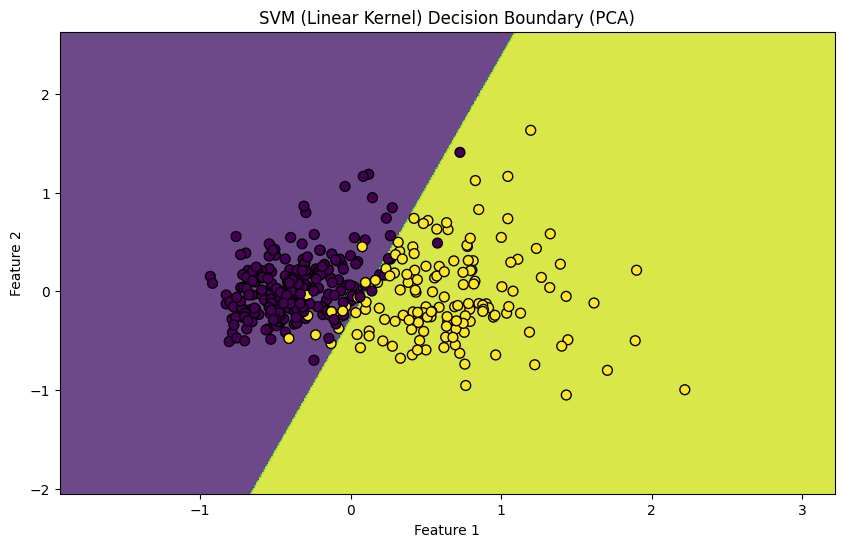

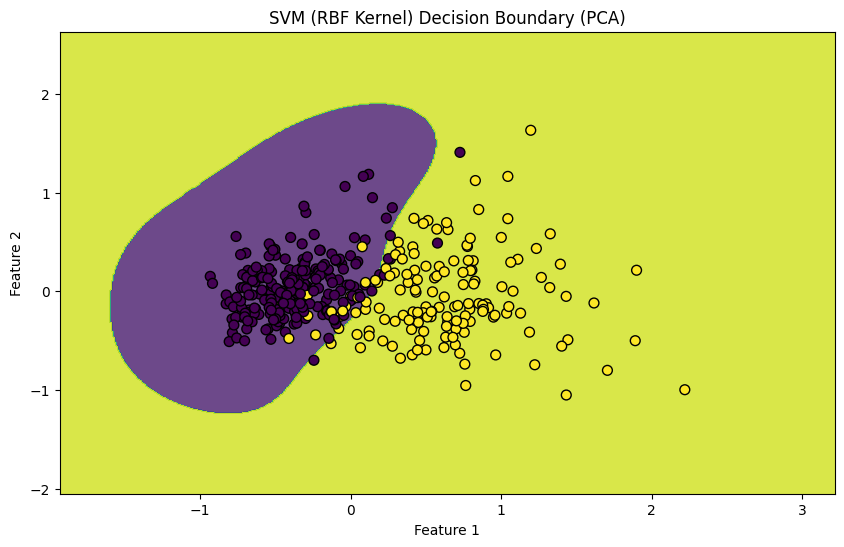

In [75]:
# Plotting decision boundaries for both PCA-trained models
plot_decision_boundary(X_train_pca, y_train, svm_linear_pca, "SVM (Linear Kernel) Decision Boundary (PCA)")
plot_decision_boundary(X_train_pca, y_train, svm_rbf_pca, "SVM (RBF Kernel) Decision Boundary (PCA)")

#### 4.Tuning Hyperparameters

In [76]:
#tuning hyperparameters like C and gamma for SVM with RBF kernel with pca dataset
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1]
}

In [77]:
grid_search = GridSearchCV(SVC(kernel='rbf', random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_pca, y_train)
print("Best parameters found: ", grid_search.best_params_)


Best parameters found:  {'C': 100, 'gamma': 0.01}



Best SVM (RBF Kernel) from Grid Search Performance:
Accuracy: 0.9415
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       108
           1       0.93      0.90      0.92        63

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



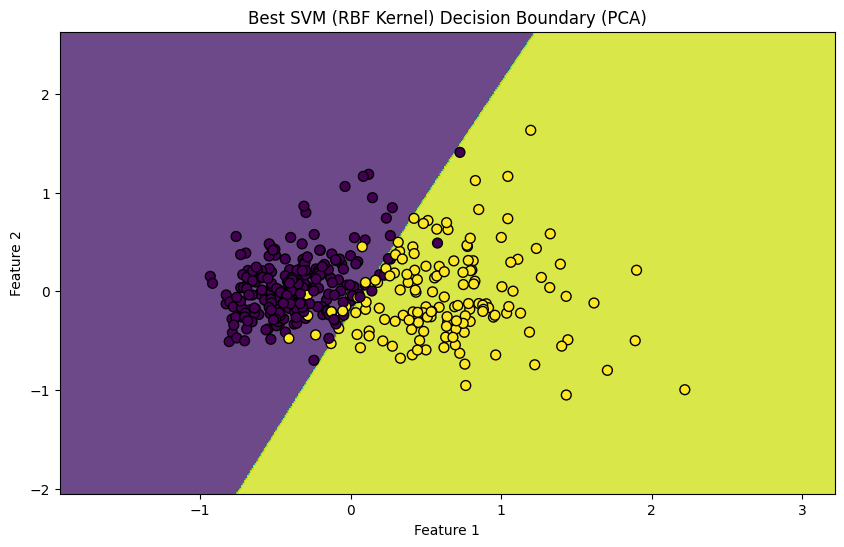

In [78]:
# Evaluate the best model from grid search
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_pca)
evaluate_model(y_test, y_pred_best, "Best SVM (RBF Kernel) from Grid Search")
# Plotting decision boundary for the best model
plot_decision_boundary(X_train_pca, y_train, best_model, "Best SVM (RBF Kernel) Decision Boundary (PCA)")


#### 5.Use cross validation to evaluate performance

In [79]:
#Using cross validation to evaluate the best model  
from sklearn.model_selection import cross_val_score


In [80]:
cv_scores = cross_val_score(best_model, X_train_pca, y_train, cv=5, scoring='accuracy')

In [81]:
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean():.4f}")

Cross-validation scores: [0.9375     0.95       0.9375     0.93670886 0.96202532]
Mean cross-validation score: 0.9447


In [ ]:
#using cross validation to evaluate the svm linear pca model
cv_scores_linear = cross_val_score(svm_linear_pca, X_train_pca, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation scores for SVM Linear PCA: {cv_scores_linear}")
print(f"Mean cross-validation score for SVM Linear PCA: {cv_scores_linear.mean():.4f}")


Cross-validation scores for SVM Linear PCA: [0.9375     0.95       0.9375     0.93670886 0.93670886]
Mean cross-validation score for SVM Linear PCA: 0.9397
